#Attention Matrix:
An **attention matrix** represents the attention weights for each pair of queries and keys.
one of the benefits of attention mechanisms is that the attention weights are very intuitive to interpret, making use of the **attention matrix**; A weight close to one means that the query $\mathbf{q}$ and the value $\mathbf{k_i}$ are very similar and therefore close attention should be paid to the respective value $\mathbf{v_i}$, while a weight close to zero would indicate the opposite.



In [17]:
# Importar las librerías necesarias
import torch #pytorch
import matplotlib.pyplot as plt

# Definir la función show_heatmaps
def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5), cmap='Reds'):
    """
    DESCRIPTION: Function for plot attention matrix in a heatmap.
    -------------------------------------------------------------------
    -------------------------------------------------------------------
    PARAMETERS:
    - matrices (tensor torch): Tensor with the attention matrix or the multiples attention matrix.
    - xlabel (str): Label of the x axis.
    - ylabel (str): Label of the y axis.
    - titles (str): Titles of the attention matrix.
    - figsize (tuple): Size of the plots.
    - cmap (str): color space of the plots.
    -------------------------------------------------------------------
    -------------------------------------------------------------------
    RETURN:
    """
    # Obtener el número de dimensiones de las matrices de entrada
    num_dimensions = matrices.ndim

    if num_dimensions == 2:
        # Si hay 2 dimensiones, convertir la matriz en una matriz de un solo elemento
        matrices = matrices.unsqueeze(0).unsqueeze(0)
    elif num_dimensions == 3:
        # Si hay 3 dimensiones, convertir la matriz en una matriz de un solo elemento
        matrices = matrices.unsqueeze(0)
    elif num_dimensions != 4:
        raise ValueError("La matriz de atención debe tener 2, 3 o 4 dimensiones.")

    # Obtener las dimensiones de las matrices de entrada
    num_rows, num_cols, _, _ = matrices.shape

    # Crear una figura y subplots con las dimensiones especificadas
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize, sharex=True, sharey=True, squeeze=False)

    # Iterar sobre las filas y columnas de los subplots
    for i in range(num_rows):
        for j in range(num_cols):
            # Obtener el eje correspondiente y la matriz de atención
            ax = axes[i, j]
            matrix = matrices[i, j]

            # Mostrar el mapa de calor de la matriz en el subplot actual
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)

            # Establecer la etiqueta del eje x en el último subplot de cada fila
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)

            # Establecer la etiqueta del eje y en el primer subplot de cada columna
            if j == 0:
                ax.set_ylabel(ylabel)

            # Establecer el título del subplot si se proporciona
            if titles:
                ax.set_title(titles[j])

    # Agregar una barra de color para los mapas de calor
    fig.colorbar(pcm, ax=axes, shrink=0.6)

    # Mostrar la figura
    plt.show()

we visualize the identity matrix, which represents a case in which the weight of attention is one only when the query and the key are the same:

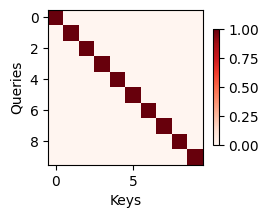

tensor([[[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]]])


In [20]:
# Crear una matriz de pesos de atención como ejemplo
attention_weights = torch.eye(10).reshape((1, 1, 10, 10))

# Llamar a la función show_heatmaps con la matriz de pesos de atención y las etiquetas correspondientes
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')
print(attention_weights)

another example of attention matrix:

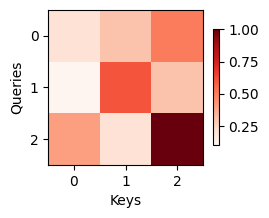

In [26]:
# Definir una matriz de atención personalizada
attention_weights = torch.tensor([
    [[0.2, 0.3, 0.5],
     [0.1, 0.6, 0.3],
     [0.4, 0.2, 1]]
])

# Llamar a la función show_heatmaps con la matriz de atención y las etiquetas correspondientes
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')

now, if we have multiple attention matrices, where each matrix represents the attention weights for a pair of specific queries and keys **(Useful for multihead attention).**

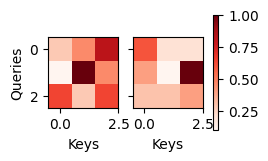

In [27]:
# Definir una matriz de atención con varias filas y columnas
attention_weights = torch.tensor([
    [[0.2, 0.3, 0.5],
     [0.1, 0.6, 0.3],
     [0.4, 0.2, 0.4]],

    [[0.6, 0.2, 0.2],
     [0.4, 0.1, 1],
     [0.3, 0.3, 0.4]]
])

# Llamar a la función show_heatmaps con la matriz de atención y las etiquetas correspondientes
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')


Now, the above examples are for cases where I have multiple $\mathbf{Q}$ queries over $m$ key-value tuples; but now let's look at the case in which I have a single query $\mathbf{q}$ over the $m$ key-value tuples **(classic case)**:

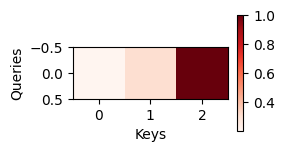

In [28]:
# Definir una matriz de atención personalizada
attention_weights = torch.tensor([
    [[0.2, 0.3, 1]]
])

# Llamar a la función show_heatmaps con la matriz de atención y las etiquetas correspondientes
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')

now let's look at the case in which I have a single query $\mathbf{q}$ over the $m$ key-value tuples (classic case) in **multiples head**:

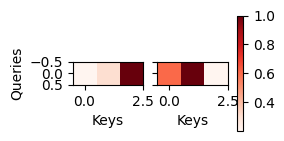

In [29]:
# Definir una matriz de atención con varias filas y columnas
attention_weights = torch.tensor([
    [[0.2, 0.3, 1]],

    [[0.6, 1, 0.2]]
])

# Llamar a la función show_heatmaps con la matriz de atención y las etiquetas correspondientes
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')

#Attention Scooring Functions:
the above attention weights are computed from a attention scooring function.

- **Gaussian:**
$\alpha (\mathbf{q},\mathbf{k_{i}})=exp(-\frac{1}{2}\lVert \mathbf{q}-\mathbf{k_{i}} \rVert_2^{2})$

- **Boxcar:** $\alpha (\mathbf{q},\mathbf{k_{i}})=1$ if $\lVert \mathbf{q}-\mathbf{k_{i}} \rVert_2 \leq 1$

- **Epanechikov:** $\alpha (\mathbf{q},\mathbf{k_{i}})=max(0,1-\lVert \mathbf{q}-\mathbf{k_{i}} \rVert_2$)



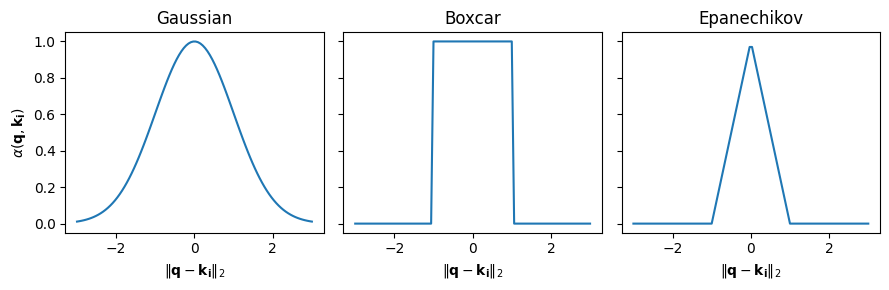

In [40]:
# Crear la figura y subplots
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(9, 3))

# Definir algunas attention scoring functions:
def gaussian(x):
    return torch.exp(-x**2 / 2) #where x=||q-k_i||

def boxcar(x):
    return torch.abs(x) < 1.0 #where x=||q-k_i||

def epanechikov(x):
    return torch.max(1 - torch.abs(x), torch.zeros_like(x)) #where x=||q-k_i||

# Calcular los valores de x
x = torch.linspace(-3, 3, 100)

# Calcular los valores de y para cada función de kernel y trazar los gráficos correspondientes
axes[0].plot(x, gaussian(x))
axes[0].set_title('Gaussian')
axes[0].set_xlabel(r'$\|\mathbf{q}-\mathbf{k_{i}}\|_2$')
axes[0].set_ylabel(r'$\alpha (\mathbf{q},\mathbf{k_{i}})$')


axes[1].plot(x, boxcar(x))
axes[1].set_title('Boxcar')
axes[1].set_xlabel(r'$\|\mathbf{q}-\mathbf{k_{i}}\|_2$')

axes[2].plot(x, epanechikov(x))
axes[2].set_title('Epanechikov')
axes[2].set_xlabel(r'$\|\mathbf{q}-\mathbf{k_{i}}\|_2$')

# Ajustar los espacios entre los subplots y mostrar la figura
plt.tight_layout()
plt.show()


as we can see, all the attention scoring functions are based on a distance, to measure similarity between a query $\mathbf{q}$ and a key $\mathbf{k_{i}}$.

Different attention scoring functions correspond to different notions of range and smoothness. For example, the Boxcar and Epanechikov functions only pay attention to values $\mathbf{v_{i}}$ for which the respective query $\mathbf{q}$ and key $\mathbf{k_{i}}$ have a distance less than one, while the Gaussian has a broader attention domain.